# Lab 12: Feature Engineering & Cross-Validation
In this lab, you will practice using scikit-learn to do feature engineering and cross-validation to produce a model with low error on held-out data. Lab 12 will prepare you for Homework 6.

### Due Date 
This assignment is due **Sunday November 24** at 11:59pm.

### Collaboration Policy
Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

In [1]:
from IPython.display import display, Latex, Markdown

import csv
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
np.random.seed(47)

### Introduction

For this lab, we will use a dataset to predict the house prices in Boston. You can access the data in `boston_data.csv`.


The data contains these features:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. LSTAT    % lower status of the population
    13. MEDV     Median value of owner-occupied homes in $1000's
    

In [2]:
boston = pd.read_csv('boston_data.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Question 1

Let's model this housing price data! Before we can do this, however, we need to split the data into training and test sets. The latter, held-out points will be used to choose the best performing model. Remember that the response vector (housing prices) lives in the `target` attribute. A random seed is set here so that we can generate the same splitting in the future if we want to test our result again and find potential bugs.

Use the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out 10% of the data for test. Call the resulting splits `X_train`, `X_test`, `Y_train`, `Y_test`. 

Since the split is random, the function has an argument called `random_state` used for the [random seed](https://en.wikipedia.org/wiki/Random_seed). **Please pass the value 47.**


In [3]:
X = boston.drop(columns='MEDV')
Y = boston['MEDV']

# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)
#raise NotImplementedError()

In [4]:
# TEST
assert X_train.shape == (455, 12)
assert Y_train.shape == (455,)

### Question 2

As a warmup, fit a linear model to describe the relationship between the housing price and all available features. We've imported `LinearRegression` from `sklearn`. Fill in the cells below to fit a linear regression model to the covariates and create a scatter plot for our predictions vs. the true prices.

In [5]:
linear_model = LinearRegression()

# Fit your linear model
linear_model.fit(X_train, Y_train)

# YOUR CODE HERE
#raise NotImplementedError()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

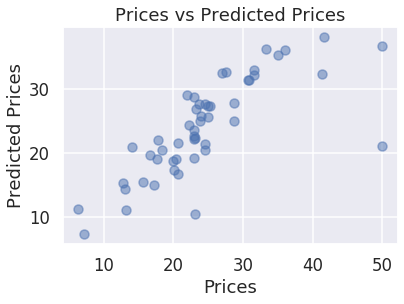

In [6]:
# Predict housing prices on the test set call it Y_pred
Y_pred = linear_model.predict(X_test)
# YOUR CODE HERE
#raise NotImplementedError()

# Plot predicted vs true prices
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices");

Briefly analyze the scatter plot above. Do you notice any outliers? Write your answer in the cell below.

There are several outliers as the prices and predicted prices go up. Yet overall, the predicted prices and actual prices seem consistent.

### Question 3

As we find from the scatter plot, our model is not perfect. If it were perfect, we would see the identity line (i.e. a line of slope 1). Compute the root mean squared error (RMSE) of the predicted responses: 

$$
\textbf{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 }
$$

Fill out the function below and compute the RMSE for our predictions on both the training data `X_train` and the test set `X_test`.  Note your implementation should not contain the word **"for"** (...that would be very slow).


In [7]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    # YOUR CODE HERE
    return np.sqrt(np.mean((actual_y - predicted_y)**2))
    #raise NotImplementedError()

train_error = rmse(Y_train, linear_model.predict(X_train)) 
test_error = rmse(Y_test, Y_pred) 

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 4.640809764298202
Test RMSE: 5.750172235260679


In [8]:
# TEST
np.allclose((train_error, test_error), (4.6408097642982, 5.750172235260679))

True

Is your training error lower than the test error? If so, why could this be happening? Answer in the cell below.

It is lower than the test error, this could be happening because it is the root mean square error,  based on the linear model, rather than on the predicted value

## Cross Validation

Let's try building a simpler linear model with fewer features. While this may increase our training error, it may also decrease our test error and help prevent overfitting to the training set.

In the next section, we'll use $k$-fold cross-validation to select the best subset of features for our model. Recall the approach looks something like:

<img src="cv.png" width=500px>

**Warning**: Don't use the test set to perform the feature selection! We want to avoid using the test set too frequently, as we want to preserve some data to see how well our model truly performs. When selecting features or choosing hyper-parameters, we can split the training set further into train and validation sets. Then we can use the average validation error to help select hyper-parameters.

### Question 4

Scikit-learn has built-in support for cross validation.  However, to better understand how cross validation works complete the following function which cross validates a given model.

1. Use the [`KFold.split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to get 4 splits on the training data. Note that `split` returns the indices of the data for that split.
2. For each split, select out the rows and columns based on the split indices and features.
3. Compute the RMSE on the validation split.
4. Return the average and standard deviation across all cross validation splits.


In [9]:
def compute_CV_error(model, X_train, Y_train, number_folds = 4):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the RMSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average RMSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=number_folds, random_state=47)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = rmse(model.predict(split_X_valid), split_Y_valid)

        # YOUR CODE HERE
        #raise NotImplementedError()

        validation_errors.append(error)
        
    return np.mean(validation_errors), np.std(validation_errors)

In [10]:
# TEST
avg, std = compute_CV_error(LinearRegression(), X_train[['TAX', 'INDUS', 'CRIM']],Y_train)
assert np.isclose(avg, 7.593764533936076)

### Question 5

We have defined four different feature sets, each containing three features (stored in `feature_sets` below). Use the sum of the outputs of `compute_CV_error` to determine a feature set. Then, fill in the variables `best_err_idx`, `best_err`, and `best_feature_set` below. Here we add the average of validation error and the standard deviation of validation error because we want an accurate and precise feature set. 

**Hint:** To find the index of the lowest error in `errors`, you may want to use [`np.argmin`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html).


In [11]:
feature_sets = [['CRIM', 'ZN', 'INDUS'],
       ['CHAS', 'NOX', 'RM'],
       ['AGE', 'DIS', 'RAD'],
       ['TAX', 'PTRATIO', 'LSTAT']]

errors = []
for feat in feature_sets:
    print("Trying features:", feat)
    model = LinearRegression()
    
    # compute the cross validation error
    avg, std = compute_CV_error(model, X_train[feat],Y_train) 
    
    print("\tRMSE:", (avg,std))
    errors.append(avg + std)

# YOUR CODE HERE
best_err_idx = np.argmin(errors)
best_err = errors[best_err_idx]
best_feature_set = feature_sets[best_err_idx]
#raise NotImplementedError()

for i in range(4):
    print('{}, error: {}'.format(feature_sets[i], errors[i]))

best_feature_set, best_err

Trying features: ['CRIM', 'ZN', 'INDUS']
	RMSE: (7.575943400812351, 1.2416397028136712)
Trying features: ['CHAS', 'NOX', 'RM']
	RMSE: (5.903393179303023, 0.5300346496164386)
Trying features: ['AGE', 'DIS', 'RAD']
	RMSE: (8.069257351941934, 1.255811385129712)
Trying features: ['TAX', 'PTRATIO', 'LSTAT']
	RMSE: (5.861215853548103, 0.7534608006594717)
['CRIM', 'ZN', 'INDUS'], error: 8.817583103626022
['CHAS', 'NOX', 'RM'], error: 6.433427828919462
['AGE', 'DIS', 'RAD'], error: 9.325068737071646
['TAX', 'PTRATIO', 'LSTAT'], error: 6.614676654207575


(['CHAS', 'NOX', 'RM'], 6.433427828919462)

In [12]:
# TEST
assert np.all(best_feature_set == ['CHAS', 'NOX', 'RM'])

### Question 6

Finally, fit a linear model using the feature set from Question 5. Predict housing prices for the test set `X_test`. Compute the final train and test RMSEs for a linear model using your best feature set.


In [18]:
model.fit(X_train[best_feature_set], Y_train)
# Predict points from our test set and calculate the mse
train_rmse = rmse(model.predict(X_train[best_feature_set]), Y_train)
test_rmse = rmse(model.predict(X_test[best_feature_set]), Y_test)

# YOUR CODE HERE
#raise NotImplementedError()

print("Train RMSE", train_rmse)
print("Test RMSE", test_rmse)

Train RMSE 5.842907511167194
Test RMSE 8.260153026116205


In [19]:
# TEST
assert np.abs(test_rmse - 8.260153026116207) < 1e-3

Here we've plotted a residual plot for each record from `X_test`. After seeing your testing and training error, it is often helpful to visiualize your error. When points in the residual plot are randomly scattered around the line y = 0, then we know that a linear regression model is good for the data we have.

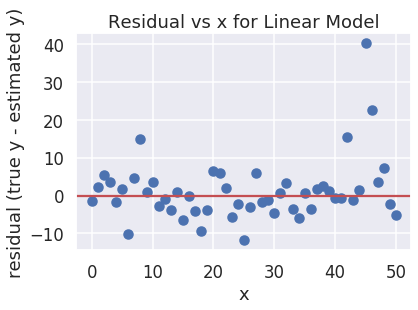

In [20]:
plt.scatter(np.arange(len(X_test)), Y_test - model.predict(X_test[best_feature_set]))
plt.xlabel('x')
plt.ylabel('residual (true y - estimated y)')
plt.title('Residual vs x for Linear Model')
plt.axhline(y = 0, color='r');

Nice! You've used $k$-fold cross-validation to fit a linear regression model to the housing data.

In the future, you'd probably want to use something like [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to automatically perform cross-validation, but it's instructive to do it yourself at least once.